In [35]:
import pandas as pd
import spacy
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('data.csv')

In [15]:
df = df.drop(columns='modalite')

In [14]:
df

,titre,description,prix,note,durée,modalite
0,formation-ceph-stockage-distribue/CEPH-STOCK/,{'Objectifs pédagogiques': ['Décrire le foncti...,1510€HT,"4,6/5",2jours,"Classe à distance, Classe à distance"
1,formation-ceph-stockage-distribue/CEPH-STOCK/,{'Objectifs pédagogiques': ['Décrire le foncti...,1510€HT,"4,6/5",2jours,"Classe à distance, Classe à distance"
2,formation-citrix-virtual-apps-and-desktops-7-h...,{'Objectifs pédagogiques': ['Gérer les utilisa...,1650€HT,"4,6/5",2jours,"Classe à distance, Classe à distance"
3,formation-citrix-virtual-apps-and-desktops-7-h...,{'Objectifs pédagogiques': ['Gérer les utilisa...,1650€HT,"4,6/5",2jours,"Classe à distance, Classe à distance"
4,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours,"Classe à distance, Classe à distance"
...,...,...,...,...,...,...
158,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours,"Classe à distance, Classe à distance"
159,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours,"Classe à distance, Classe à distance"
160,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours,"Classe à distance, Classe à distance"
161,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours,"Classe à distance, Classe à distance"


In [17]:
df

,titre,description,prix,note,durée
0,formation-ceph-stockage-distribue/CEPH-STOCK/,{'Objectifs pédagogiques': ['Décrire le foncti...,1510€HT,"4,6/5",2jours
1,formation-ceph-stockage-distribue/CEPH-STOCK/,{'Objectifs pédagogiques': ['Décrire le foncti...,1510€HT,"4,6/5",2jours
2,formation-citrix-virtual-apps-and-desktops-7-h...,{'Objectifs pédagogiques': ['Gérer les utilisa...,1650€HT,"4,6/5",2jours
3,formation-citrix-virtual-apps-and-desktops-7-h...,{'Objectifs pédagogiques': ['Gérer les utilisa...,1650€HT,"4,6/5",2jours
4,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours
...,...,...,...,...,...
158,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours
159,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours
160,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours
161,formation-vmware-nsx-4-install-configure-manag...,"{'Objectifs pédagogiques': [""Décrire l'archite...",4400€HT,"4,6/5",5jours


In [18]:
df['description'] = df['description'].apply(lambda x: ast.literal_eval(x))


In [21]:
df.dropna(inplace=True)

In [24]:
df['prix'] = df['prix'].apply(lambda x: re.sub(r'\D', '', x)).astype(float)


In [25]:
df['note'] = df['note'].apply(lambda x: str(x).replace(',', '.'))

In [27]:
df['durée'] = df['durée'].apply(lambda x: re.sub(r'\D', '', x)).astype(int)


In [28]:
df['titre'] = df['titre'].str.lower()

In [30]:
df['titre'] = df['titre'].str.strip()


In [33]:
df.reset_index(drop=True, inplace=True)

In [34]:
df

,titre,description,prix,note,durée
0,formation-ceph-stockage-distribue/ceph-stock/,{'Objectifs pédagogiques': ['Décrire le foncti...,1510.0,4.6/5,2
1,formation-ceph-stockage-distribue/ceph-stock/,{'Objectifs pédagogiques': ['Décrire le foncti...,1510.0,4.6/5,2
2,formation-citrix-virtual-apps-and-desktops-7-h...,{'Objectifs pédagogiques': ['Gérer les utilisa...,1650.0,4.6/5,2
3,formation-citrix-virtual-apps-and-desktops-7-h...,{'Objectifs pédagogiques': ['Gérer les utilisa...,1650.0,4.6/5,2
4,formation-vmware-nsx-4-install-configure-manag...,{'Objectifs pédagogiques': ['Décrire l'archite...,4400.0,4.6/5,5
...,...,...,...,...,...
158,formation-vmware-nsx-4-install-configure-manag...,{'Objectifs pédagogiques': ['Décrire l'archite...,4400.0,4.6/5,5
159,formation-vmware-nsx-4-install-configure-manag...,{'Objectifs pédagogiques': ['Décrire l'archite...,4400.0,4.6/5,5
160,formation-vmware-nsx-4-install-configure-manag...,{'Objectifs pédagogiques': ['Décrire l'archite...,4400.0,4.6/5,5
161,formation-vmware-nsx-4-install-configure-manag...,{'Objectifs pédagogiques': ['Décrire l'archite...,4400.0,4.6/5,5


In [36]:
df.describe()

,prix,durée
count,163.000000,163.000000
mean,4330.797546,4.926380
std,437.787622,0.465584
min,1510.000000,2.000000
25%,4400.000000,5.000000
50%,4400.000000,5.000000
75%,4400.000000,5.000000
max,4400.000000,5.000000


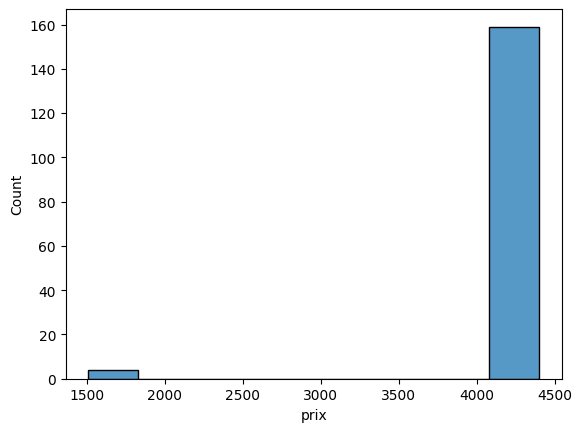

In [37]:
sns.histplot(data=df, x='prix')
plt.show()

In [39]:
print(df.dtypes)

titre           object
description     object
prix           float64
note            object
durée            int32
dtype: object


In [40]:
print(df['prix'].unique())
print(df['note'].unique())
print(df['durée'].unique())

[1510. 1650. 4400.]
['4.6/5']
[2 5]


In [41]:
df['prix'] = pd.to_numeric(df['prix'], errors='coerce')
df['note'] = pd.to_numeric(df['note'], errors='coerce')
df['durée'] = pd.to_numeric(df['durée'], errors='coerce')

In [42]:
df['note_normalized'] = (df['note'] - df['note'].min()) / (df['note'].max() - df['note'].min())

In [43]:
df.dropna(inplace=True)

In [45]:
df_sample = df.sample(frac=0.2, random_state=42)

In [47]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (e.g., 80-20 split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Split the training set further into training and validation sets (e.g., 70-15-15 split)
train_df, val_df = train_test_split(train_df, test_size=0.15, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.